In [5]:
import numpy as np
import pandas as pd 

In [6]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\athlete_events.csv")
region_df=pd.read_csv(r"C:\Users\DELL\Desktop\noc_regions.csv")

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# Filtering the data for summer season 

In [9]:
df=df[df['Season']=='Summer']

In [10]:
df.head()
# df3.drop(columns=['region_x','region_y','notes_y','notes_x'],inplace=True)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


# Merging the data df and region_df

In [11]:
df=df.merge(region_df,on="NOC",how='left')

In [12]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


# Number of country paricipated 

In [13]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

# Counting Missing and duplicates values

In [14]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [15]:
df.duplicated().sum()

1385

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

# Medal Count on the basis of region

In [18]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [19]:
# creating a dummy dataframe 
dummy=pd.get_dummies(df['Medal'])
dummy

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
222547,False,False,False
222548,False,False,False
222549,False,False,False
222550,False,False,False


In [20]:
#concatanating dummy dataframe and orginal dataframe
df=pd.concat([df,dummy],axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [21]:
df.groupby('NOC').sum()[["Gold","Silver","Bronze"]]

,Gold,Silver,Bronze
NOC,,,
AFG,0,0,2
AHO,0,1,0
ALB,0,0,0
ALG,5,4,8
AND,0,0,0
...,...,...,...
YEM,0,0,0
YMD,0,0,0
YUG,130,161,92


In [22]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [23]:
df[(df['NOC']=="IND") & (df['Medal']=='Gold')].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False


In [24]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [25]:
medal_tally=medal_tally.groupby('NOC').sum()[["Gold","Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()

In [26]:
medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


In [27]:
medal_tally['Total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [28]:
medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze,Total
53,IND,9,7,12,28


# Years when olympics were played

In [29]:
year=df['Year'].unique().tolist()
year.sort()
year

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

# Country where olympics were played

In [30]:
country=df['region'].unique().tolist()

In [31]:
len(country)

206

In [32]:
c1=np.unique(df['region'].dropna().values).tolist()

In [33]:
c1.sort()

In [34]:
# c1

In [35]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [36]:
def fetch_model(year,country):
    flag=0
    if year == 'overall' and country == 'overall':
        temp_df=medal_df
    if year == 'overall' and country != 'overall':
        temp_df=medal_df[medal_df['region']==country]
        flag=1
    if year != 'overall' and country == 'overall':
        temp_df=medal_df[medal_df['Year']==int(year)]
    if year != 'overall' and country != 'overall':
        temp_df=medal_df[(medal_df['Year']==int(year)) & (medal_df['region']==country)]
    if flag==1:    
        X=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        X=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold').reset_index()
        
    X['total']=X['Gold']+X['Silver']+X['Bronze']
    print(X)
         

In [37]:
year=input("Enter Year")
country=input("Enter Country")
fetch_model(year,country)

Enter Year2016
Enter CountryIndia
  region  Gold  Silver  Bronze  total
0  India     0       1       1      2


# No of Sports / Event / City / Years / Athletes Name / Region 

In [38]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [39]:
df['Sport'].unique().shape[0]

52

In [40]:
df['Event'].unique().shape

(651,)

In [41]:
df['City'].unique().shape[0]

23

In [42]:
df["Year"].unique().shape[0]-1        # 1906 olympic was invalid 

28

In [43]:
df['Name'].unique().shape

(116122,)

In [44]:
df['region'].unique().shape

(206,)

# No. of participating country over time 

In [46]:
import matplotlib.pyplot as plt

In [47]:
nation_over_time=df.drop_duplicates(["Year","region"])['Year'].value_counts().reset_index().sort_values('Year')

In [48]:
nation_over_time.rename(columns={'count':'No. of Country'},inplace=True)

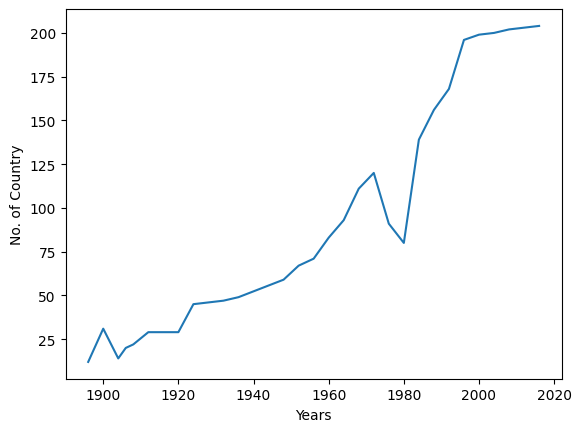

In [49]:
plt.plot(nation_over_time['Year'],nation_over_time['No. of Country'])
plt.xlabel("Years")
plt.ylabel("No. of Country")
plt.show()

# No. of events over time 

In [50]:
events_count=df.drop_duplicates(["Year","Event"])['Year'].value_counts().reset_index().sort_values('Year')
events_count.rename(columns={'count':'No. of Event'},inplace=True)

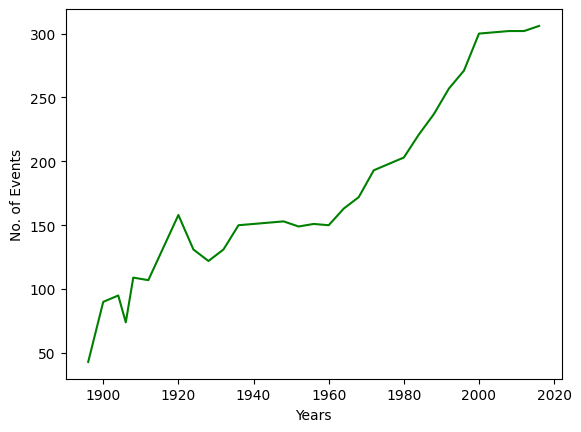

In [51]:
plt.plot(events_count['Year'],events_count['No. of Event'],color='g')
plt.xlabel("Years")
plt.ylabel("No. of Events")
plt.show()

# No. of athletes over time

In [52]:
athletes_over_time=df.drop_duplicates(["Year","Name"])['Year'].value_counts().reset_index().sort_values('Year')
athletes_over_time.rename(columns={"count":"Total Athletes"},inplace=True)

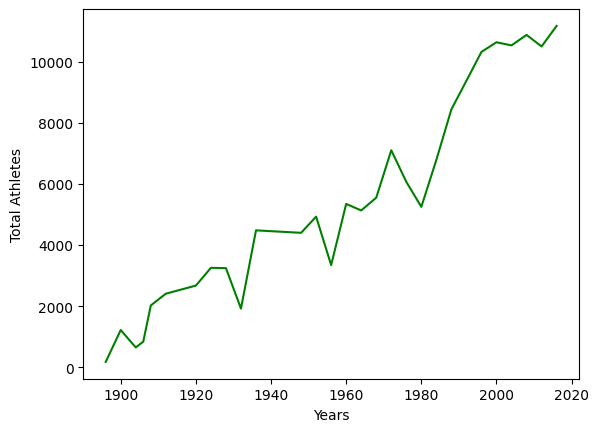

In [53]:
plt.plot(athletes_over_time['Year'],athletes_over_time['Total Athletes'],color='g')
plt.xlabel("Years")
plt.ylabel("Total Athletes")
plt.show()

# No. of Sports  over year

In [54]:
X=df.drop_duplicates(["Year","Sport","Event"])

<Axes: xlabel='Year', ylabel='Sport'>

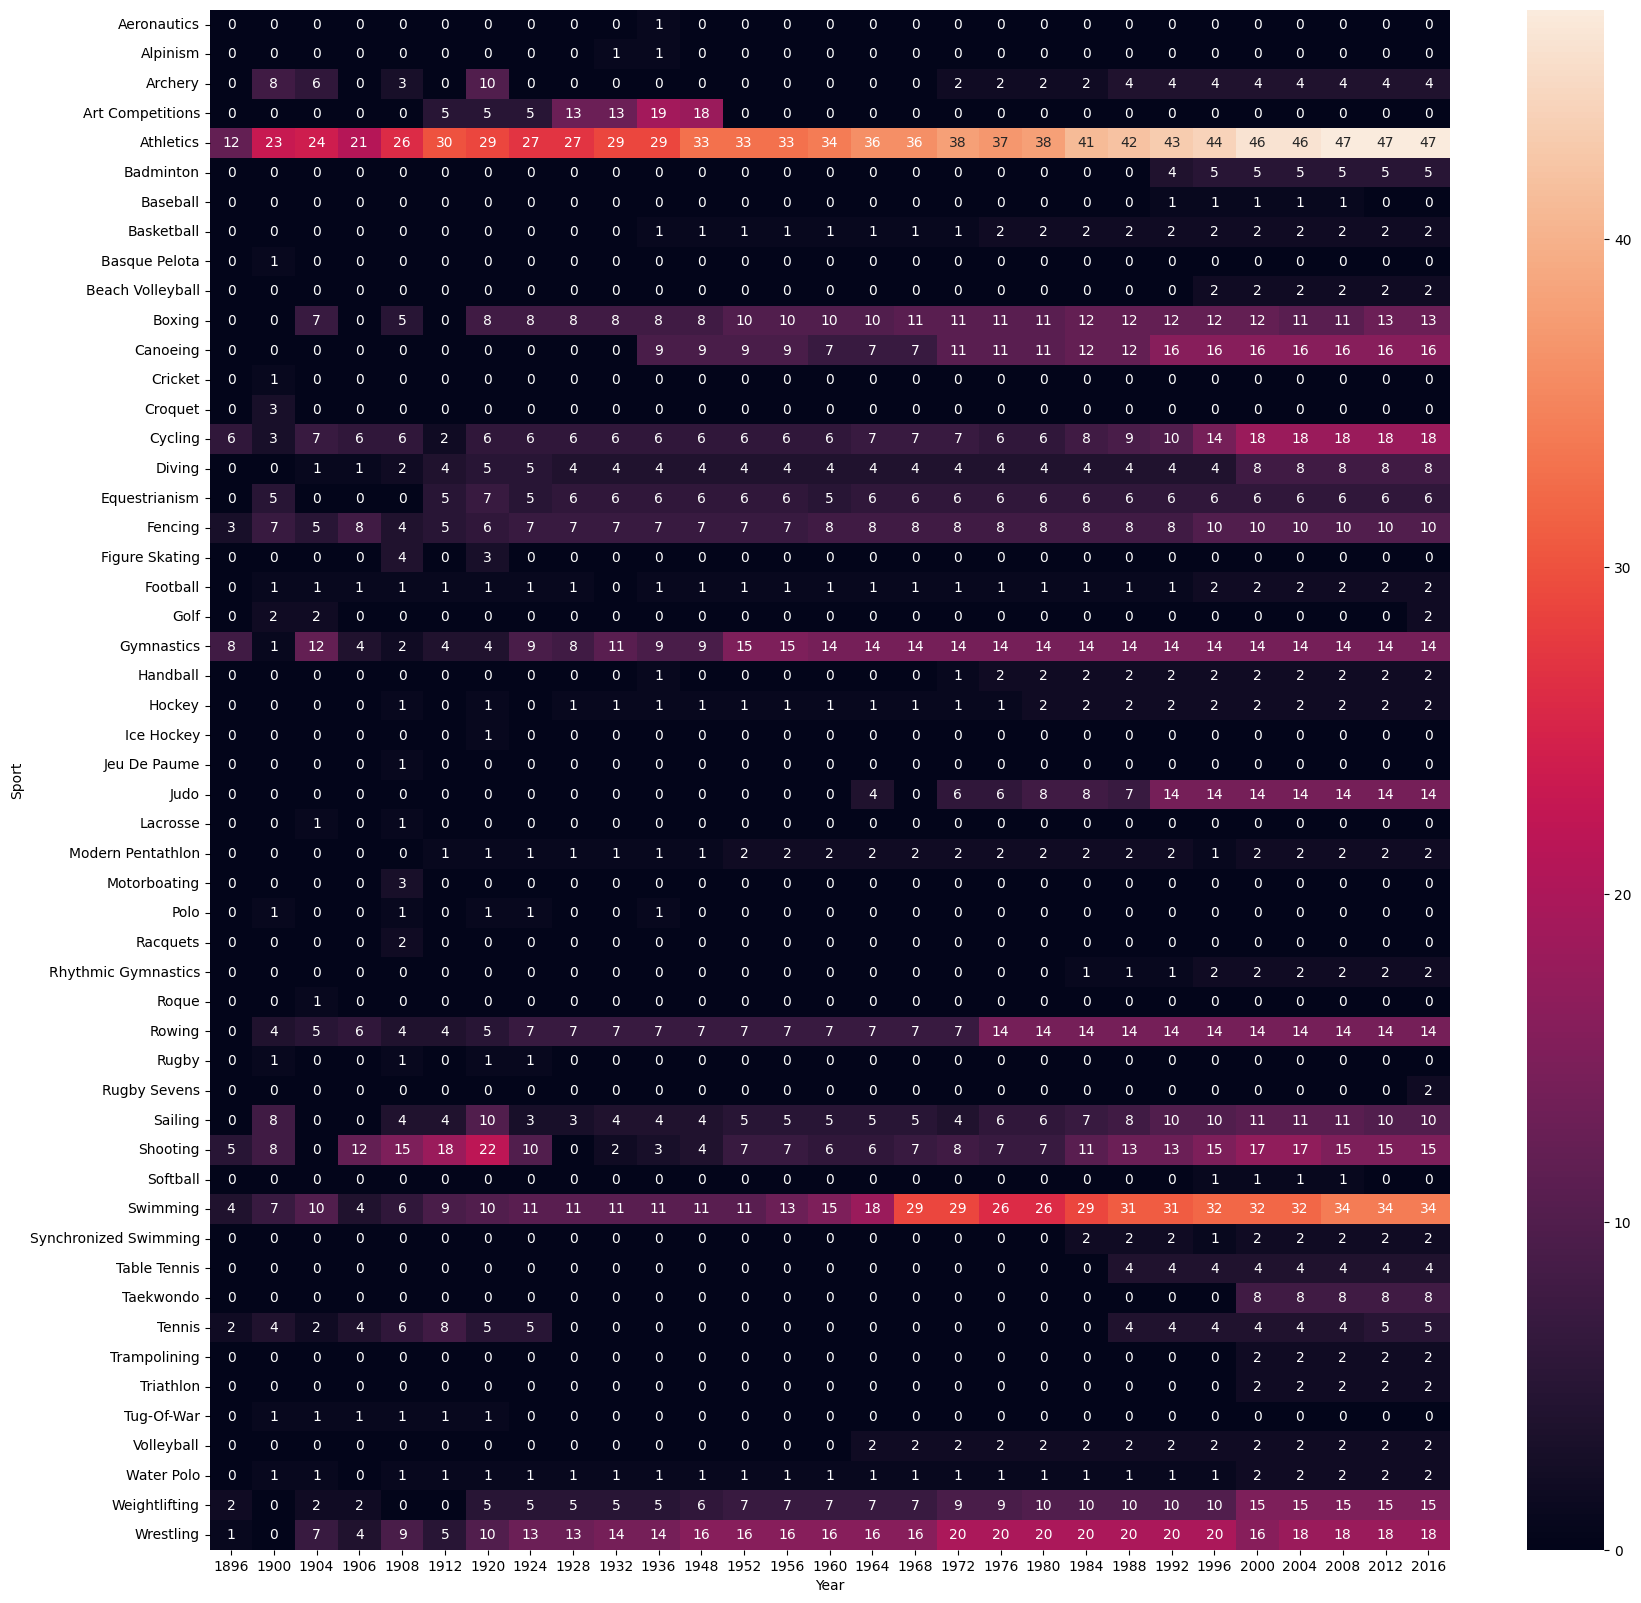

In [55]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(X.pivot_table(index='Sport',columns="Year",values='Event',aggfunc="count").fillna(0).astype(int),annot=True)

# List of Successful athletes 

In [56]:
def successful(df,sport):
    temp_df2=df.dropna(subset=['Medal'])
    if sport!="overall":
        temp_df2 = temp_df2[temp_df2["Sport"]==sport]     
    X=temp_df2['Name'].value_counts().reset_index()
    return X.rename(columns={'count':'Total Medals'}).head(20)

In [57]:
successful(df,'overall')

,Name,Total Medals
0,"Michael Fred Phelps, II",28
1,Larysa Semenivna Latynina (Diriy-),18
2,Nikolay Yefimovich Andrianov,15
3,Borys Anfiyanovych Shakhlin,13
4,Takashi Ono,13
5,Edoardo Mangiarotti,13
6,"Dara Grace Torres (-Hoffman, -Minas)",12
7,Aleksey Yuryevich Nemov,12
8,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
9,Birgit Fischer-Schmidt,12


# Country wise Medal tally per year

In [58]:
temp_df=df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6652\1910904414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)


In [59]:
new_df=temp_df[temp_df['region']=='India']
final_df=new_df.groupby("Year").count()['Medal'].reset_index()

In [60]:
final_df

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


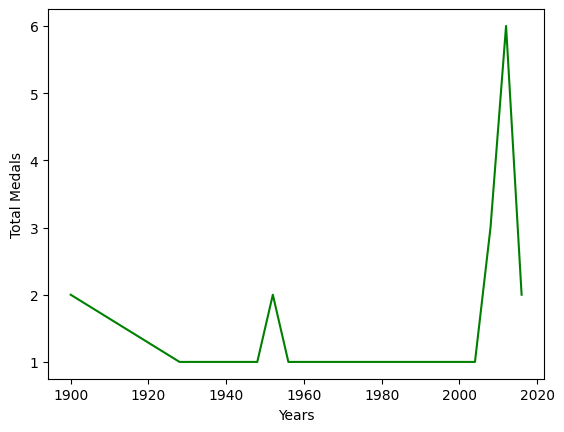

In [61]:
plt.plot(final_df['Year'],final_df['Medal'],color='g')
plt.xlabel("Years")
plt.ylabel("Total Medals")
plt.show()

# which country is good at heatmap

<Axes: xlabel='Year', ylabel='Sport'>

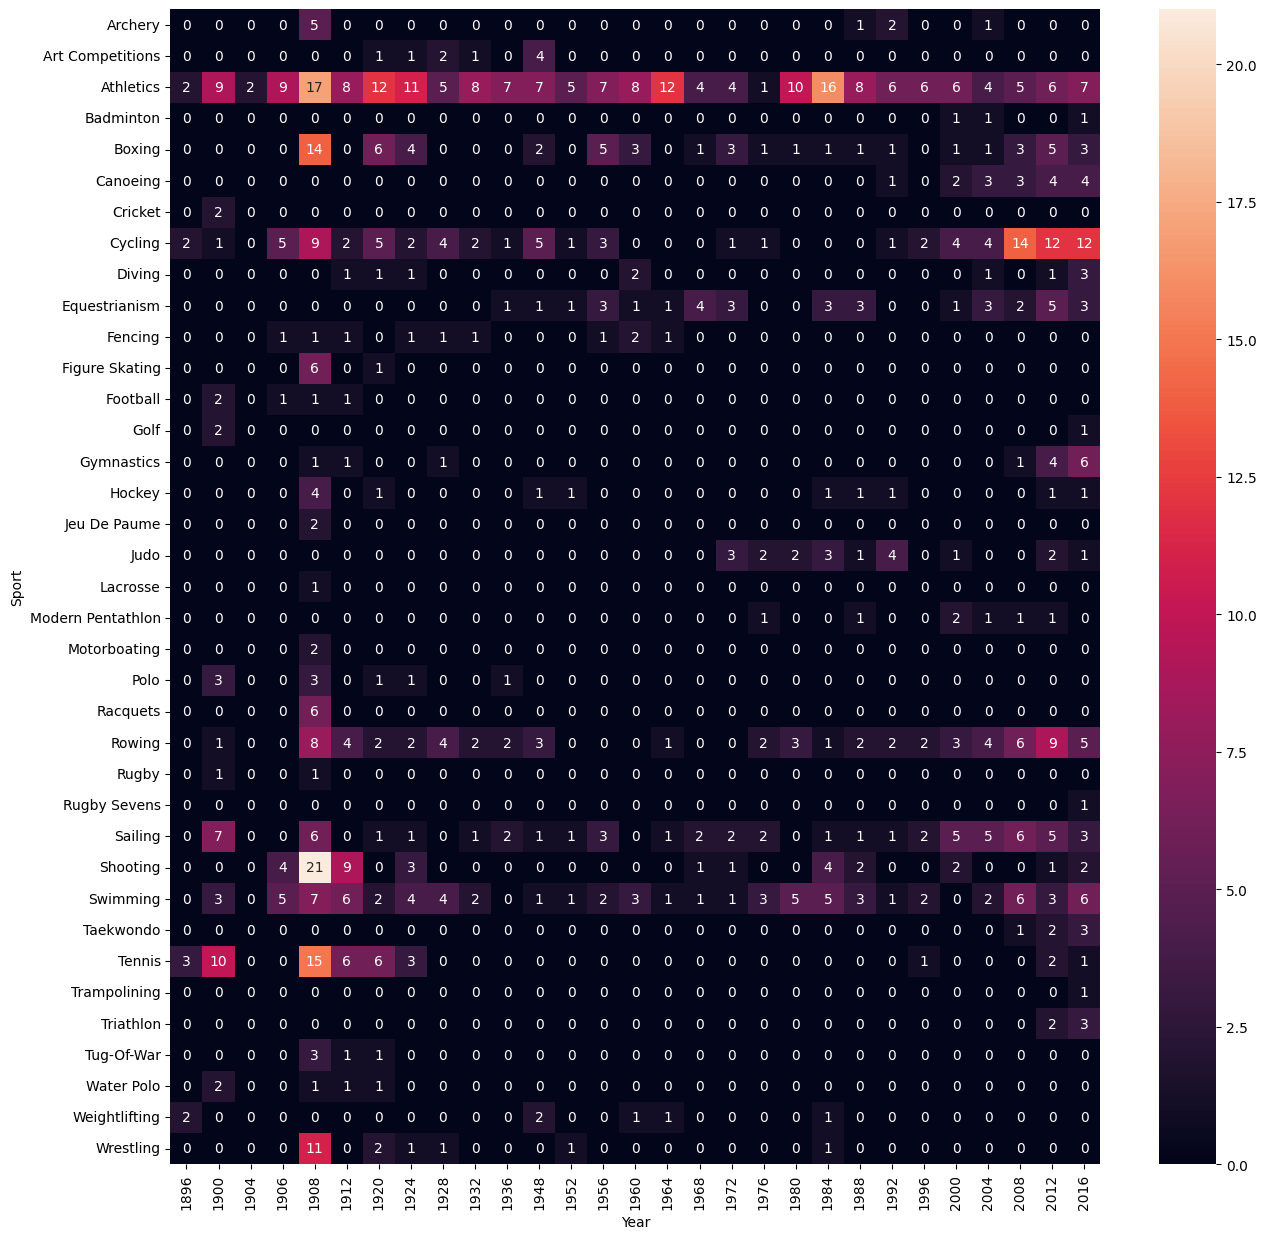

In [62]:
new_df=temp_df[temp_df['region']=='UK']
plt.figure(figsize=(15,15))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

# Analysis of Height vs Weight in different- different sports 

In [63]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [64]:
athlete_df['Medal'].fillna("No Medal",inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6652\1749223252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_df['Medal'].fillna("No Medal",inplace=True)


In [65]:
temp_df=athlete_df[athlete_df['Sport']=="Athletics"]

<Axes: xlabel='Weight', ylabel='Height'>

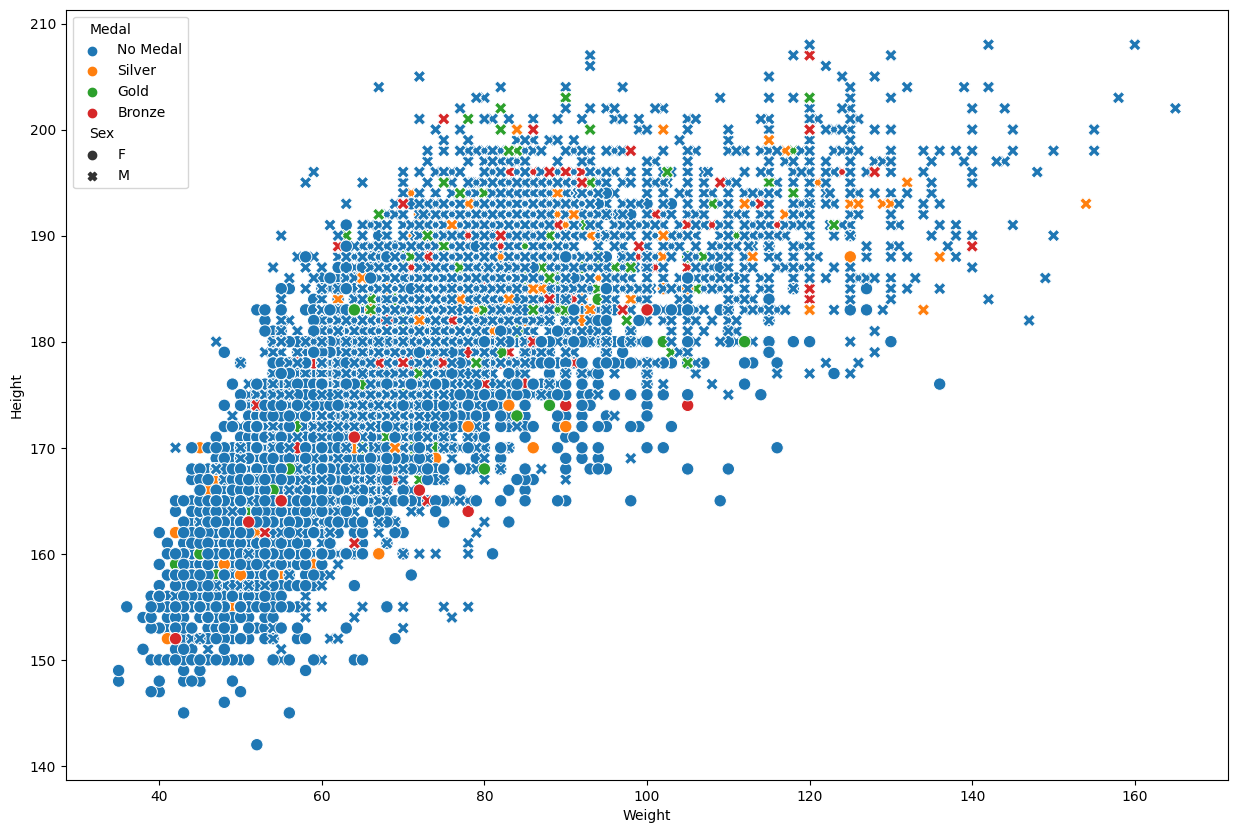

In [66]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=temp_df['Weight'],y=temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=80)

# Participation of Men Vs Women 

In [67]:
Men=athlete_df[athlete_df['Sex']=="M"].groupby("Year").count()['Name'].reset_index()
Women=athlete_df[athlete_df['Sex']=="F"].groupby("Year").count()['Name'].reset_index()

In [68]:
final=Men.merge(Women,on='Year',how='left',inplace=True)

TypeError: DataFrame.merge() got an unexpected keyword argument 'inplace'

In [ ]:
final.rename(columns={'Name_x':'Men','Name_y':'Women'},inplace=True)
final.head()

In [ ]:
final.fillna(0,inplace=True)

In [ ]:
final.astype(int).head()

In [ ]:
plt.plot(final['Year'],final['Men'],label="Men")
plt.plot(final['Year'],final['Women'],label='Women')
plt.xlabel("Year")
plt.ylabel("Total Players")
plt.legend()